In [79]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
import seaborn as sns



In [80]:
# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)


data = yf.download("AAPL", start="2014-01-01", end="2024-08-08")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.253258  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.874277  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  16.966288  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.844955  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.951633  258529600


In [81]:
# For reproducibility
#np.random.seed(42)
#tf.random.set_seed(42)

# Fetch historical stock data
#tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
#df = yf.download(ticker, start='2015-01-01', end='2024-08-08')

#print(df.head())

In [82]:
# Use the 'Close' price for modeling
data = df['Close'].values.reshape(-1, 1)



In [83]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for time series prediction
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)



In [84]:
# Reshape data for CNN, LSTM, and GRU
X = np.reshape(X, (X.shape[0], X.shape[1], 1))



In [85]:
# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [86]:
# Build and Train CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
cnn_model.save('cnn_model.keras')



Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0211 - val_loss: 0.0035
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2342e-04 - val_loss: 0.0025
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0402e-04 - val_loss: 0.0021
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7468e-04 - val_loss: 0.0019
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7630e-04 - val_loss: 0.0013
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1867e-04 - val_loss: 0.0015
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7160e-04 - val_loss: 0.0013
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3690e-04 - val_loss: 0.0011
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1472e-04 - val_loss: 0.0011
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0195e-04 - val_loss: 0.0011
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8552e-04 - val_loss: 9.0030e-04
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0

In [87]:
# Build and Train LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
lstm_model.save('lstm_model.keras')



Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0140 - val_loss: 0.0013
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.9336e-04 - val_loss: 0.0020
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.8962e-04 - val_loss: 0.0023
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.8868e-04 - val_loss: 8.4452e-04
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.8240e-04 - val_loss: 0.0016
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.0461e-04 - val_loss: 8.1234e-04
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47m

In [88]:
# Build and Train GRU Model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(look_back, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
gru_model.save('gru_model.keras')



Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - loss: 0.0432 - val_loss: 8.3010e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0016 - val_loss: 6.8920e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0016 - val_loss: 4.3933e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0013 - val_loss: 4.1933e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0010 - val_loss: 9.6806e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0011 - val_loss: 7.0166e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011 - val_loss: 7.4663e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 9.4999e-04 - val_loss: 7.0107e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 8.5625e-04 - val_loss: 0.0014
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 9.4777e-04 - val_loss: 4.5513e-04
Epoch 12/20
59

In [89]:
# Evaluate models using accuracy, precision, recall, and F1-score
def evaluate_classification_metrics(y_true, y_pred, title):
    y_true_class = np.where(y_true > np.mean(y_true), 1, 0)
    y_pred_class = np.where(y_pred > np.mean(y_pred), 1, 0)
    
    accuracy = accuracy_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    f1 = f1_score(y_true_class, y_pred_class)
    
    cm = confusion_matrix(y_true_class, y_pred_class)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1



15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


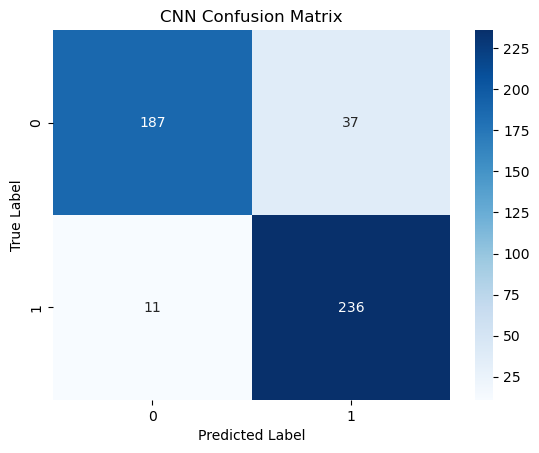

Accuracy: 0.8981
Precision: 0.8645
Recall: 0.9555
F1-Score: 0.9077


In [90]:
# CNN Model Evaluation
cnn_predictions = scaler.inverse_transform(cnn_model.predict(X_test))
cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = evaluate_classification_metrics(y_test, cnn_predictions, title="CNN Confusion Matrix")



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


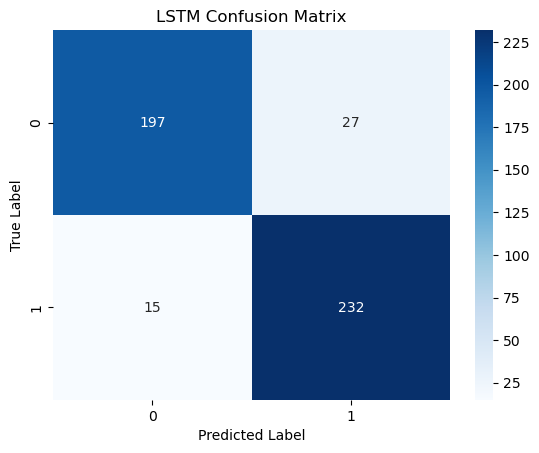

Accuracy: 0.9108
Precision: 0.8958
Recall: 0.9393
F1-Score: 0.9170


In [91]:
# LSTM Model Evaluation
lstm_predictions = scaler.inverse_transform(lstm_model.predict(X_test))
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = evaluate_classification_metrics(y_test, lstm_predictions, title="LSTM Confusion Matrix")



15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


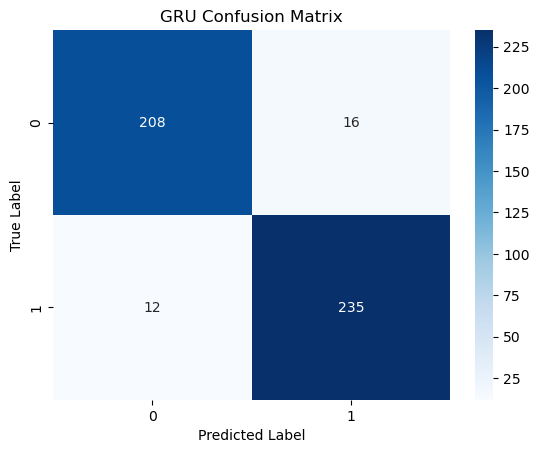

Accuracy: 0.9406
Precision: 0.9363
Recall: 0.9514
F1-Score: 0.9438


In [92]:
# GRU Model Evaluation
gru_predictions = scaler.inverse_transform(gru_model.predict(X_test))
gru_accuracy, gru_precision, gru_recall, gru_f1 = evaluate_classification_metrics(y_test, gru_predictions, title="GRU Confusion Matrix")


In [93]:
import pandas as pd

# Compile the metrics into a dictionary
metrics_data = {
    'Model': ['CNN', 'LSTM', 'GRU'],
    'Accuracy': [cnn_accuracy, lstm_accuracy, gru_accuracy],
    'Precision': [cnn_precision, lstm_precision, gru_precision],
    'Recall': [cnn_recall, lstm_recall, gru_recall],
    'F1-Score': [cnn_f1, lstm_f1, gru_f1]
}

# Create a DataFrame for all metrics
metrics_df = pd.DataFrame(metrics_data)

# Display the comparative table for all metrics
print("Comparative Table for All Metrics:")
print(metrics_df)

# Create a DataFrame for accuracy only
accuracy_df = metrics_df[['Model', 'Accuracy']]

# Display the comparative table for accuracy only
print("\nComparative Table for Accuracy Only:")
print(accuracy_df)


Comparative Table for All Metrics:
  Model  Accuracy  Precision    Recall  F1-Score
0   CNN  0.898089   0.864469  0.955466  0.907692
1  LSTM  0.910828   0.895753  0.939271  0.916996
2   GRU  0.940552   0.936255  0.951417  0.943775

Comparative Table for Accuracy Only:
  Model  Accuracy
0   CNN  0.898089
1  LSTM  0.910828
2   GRU  0.940552


In [ ]:
import matplotlib.pyplot as plt

# Line graph for all metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Model'], metrics_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(metrics_df['Model'], metrics_df['Precision'], marker='o', label='Precision')
plt.plot(metrics_df['Model'], metrics_df['Recall'], marker='o', label='Recall')
plt.plot(metrics_df['Model'], metrics_df['F1-Score'], marker='o', label='F1-Score')

plt.title('Comparative Analysis of Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Line graph for accuracy only
plt.figure(figsize=(8, 5))
plt.plot(accuracy_df['Model'], accuracy_df['Accuracy'], marker='o', label='Accuracy')

plt.title('Comparative Analysis of Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
